# 1. Importamos las librerías


In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import sklearn.neural_network as sknet
import sklearn.model_selection as skmodel
import sklearn.metrics as skmet

# Cargamos el dataset


In [3]:
df = pd.read_csv("mnist_train.csv")


# 3. Preparamos los datos


In [4]:
X = df.drop(['label'], axis=1)  # Variable independiente (todas las columnas menos 'label')
y = df['label']  # Variable dependiente (objetivo), solo la columna 'label'

# Dividimos el dataset en entrenamiento y prueba


In [5]:
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size=0.33, random_state=1)


# 4. Modelado
# Modelo basado en Redes Neuronales (MLP)

In [10]:
model_mlp = sknet.MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=42)
model_mlp.out_activation_ = 'softmax'
model_mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=42)

In [7]:
# Reducimos el tamaño del dataset para SVM (por ejemplo, usando un 20% de los datos originales)
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train[X_train_sample.index]

# Entrenamos el modelo SVM con una muestra reducida
model_svm.fit(X_train_sample, y_train_sample)


SVC()

# Modelo basado en SVM


In [8]:
model_svm = svm.SVC(kernel='rbf')  # Usamos el kernel RBF
model_svm.fit(X_train_sample, y_train_sample)  # Entrenamos con una muestra reducida



SVC()

# 5. Evaluación
# Predicciones del modelo MLP

In [11]:
y_pred_mlp = model_mlp.predict(X_test)
print("Exactitud del modelo MLP en el conjunto de prueba: {:.2%}".format(model_mlp.score(X_test, y_test)))

Exactitud del modelo MLP en el conjunto de prueba: 97.65%


# Predicciones del modelo SVM


In [12]:
y_pred_svm = model_svm.predict(X_test)
print("Exactitud del modelo SVM en el conjunto de prueba: {:.2%}".format(model_svm.score(X_test, y_test)))

Exactitud del modelo SVM en el conjunto de prueba: 95.70%


# Matriz de confusión y métricas para el modelo MLP


In [13]:
cm_mlp = skmet.confusion_matrix(y_test, y_pred_mlp)
print("Matriz de confusión para el modelo MLP:\n", cm_mlp)
print("Reporte de clasificación para el modelo MLP:\n", skmet.classification_report(y_test, y_pred_mlp))

Matriz de confusión para el modelo MLP:
 [[1907    0    3    2    4    1    3    0    7    1]
 [   0 2206   12    2    2    2    3    4    5    2]
 [   4    2 1939   10    4    1    1   11   10    0]
 [   2    2   14 1973    2   26    1    6   13    9]
 [   1    1    3    0 1862    0    5    5    1   18]
 [   2    3    1   16    3 1835    7    0   15    8]
 [   9    0    4    0    1   10 1925    0   11    1]
 [   0    8    6    1   11    1    0 2026    4   13]
 [   4    5    8   14    5   13    7    1 1826   17]
 [   3    2    3    7   15    7    0    9    6 1835]]
Reporte de clasificación para el modelo MLP:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1928
           1       0.99      0.99      0.99      2238
           2       0.97      0.98      0.98      1982
           3       0.97      0.96      0.97      2048
           4       0.98      0.98      0.98      1896
           5       0.97      0.97      0.97      1890
   

# Matriz de confusión y métricas para el modelo SVM


In [14]:
cm_svm = skmet.confusion_matrix(y_test, y_pred_svm)
print("Matriz de confusión para el modelo SVM:\n", cm_svm)
print("Reporte de clasificación para el modelo SVM:\n", skmet.classification_report(y_test, y_pred_svm))

Matriz de confusión para el modelo SVM:
 [[1897    1    4    0    4    6    6    2    8    0]
 [   0 2203   17    5    2    1    3    0    7    0]
 [   7    4 1896    9   20    3    7   14   18    4]
 [   3    8   36 1883    1   56    2   12   36   11]
 [   3    3    5    0 1829    0    8    4    4   40]
 [   3    6    7   30    8 1811   14    2    8    1]
 [   8    2    1    0    4   22 1917    0    7    0]
 [   6   11   12    2   18    2    0 1994    3   22]
 [   6   21    9   20   13   28   15   10 1762   16]
 [   2    8    6   16   43    6    1   31   17 1757]]
Reporte de clasificación para el modelo SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1928
           1       0.97      0.98      0.98      2238
           2       0.95      0.96      0.95      1982
           3       0.96      0.92      0.94      2048
           4       0.94      0.96      0.95      1896
           5       0.94      0.96      0.95      1890
   

# 6. Comparación gráfica de los modelos


In [15]:
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadero')
    plt.xlabel('Etiqueta Predicho')

# Graficamos la matriz de confusión del modelo MLP


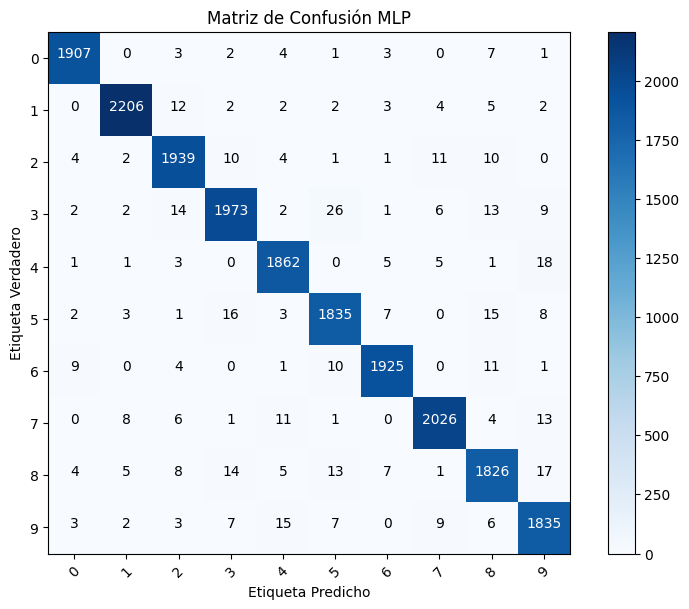

In [16]:
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_mlp, classes=[str(i) for i in range(10)], title='Matriz de Confusión MLP')
plt.show()

# Graficamos la matriz de confusión del modelo SVM


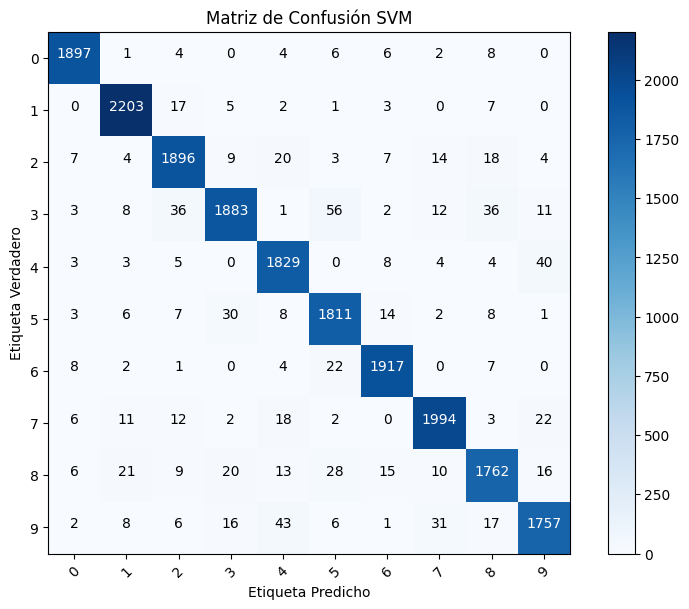

In [17]:
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_svm, classes=[str(i) for i in range(10)], title='Matriz de Confusión SVM')
plt.show()

# Selección de un dígito al azar


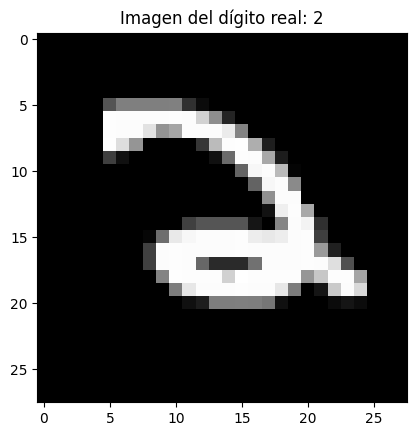

In [18]:
import random
i = random.randint(0, len(X_test) - 1)
new_pic = X_test.iloc[i].values.reshape(28, 28)
plt.imshow(new_pic, cmap='gray')
plt.title(f'Imagen del dígito real: {y_test.iloc[i]}')
plt.show()

# Predicción del dígito seleccionado al azar con ambos modelos


In [19]:
pred_mlp = model_mlp.predict(X_test.iloc[i:i + 1])[0]
pred_svm = model_svm.predict(X_test.iloc[i:i + 1])[0]
print(f"Predicción MLP: {pred_mlp}, Predicción SVM: {pred_svm}, Real: {y_test.iloc[i]}")

Predicción MLP: 2, Predicción SVM: 2, Real: 2


Precisión, Recall, F1 Score y Soporte:


In [20]:
# Reporte de clasificación para el modelo MLP
print("Reporte de clasificación para el modelo MLP:\n", skmet.classification_report(y_test, y_pred_mlp))

# Reporte de clasificación para el modelo SVM
print("Reporte de clasificación para el modelo SVM:\n", skmet.classification_report(y_test, y_pred_svm))


Reporte de clasificación para el modelo MLP:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1928
           1       0.99      0.99      0.99      2238
           2       0.97      0.98      0.98      1982
           3       0.97      0.96      0.97      2048
           4       0.98      0.98      0.98      1896
           5       0.97      0.97      0.97      1890
           6       0.99      0.98      0.98      1961
           7       0.98      0.98      0.98      2070
           8       0.96      0.96      0.96      1900
           9       0.96      0.97      0.97      1887

    accuracy                           0.98     19800
   macro avg       0.98      0.98      0.98     19800
weighted avg       0.98      0.98      0.98     19800

Reporte de clasificación para el modelo SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1928
           1       0.97      0.98      0